# CAPSTONE 3: TRADING with ML

In [1]:
# import libraries and packages
import os
import sys
module_path = os.path.abspath(os.path.join(r'C:\Users\matmi\Documents\Trading_w_ML_Capstone_3')) # or the path to your source code
sys.path.insert(0, module_path)

import pandas as pd
import numpy as np

from typing import List, Dict, Tuple, Callable, NewType, Any
from collections import OrderedDict, defaultdict

import datetime
import sklearn
import matplotlib.pyplot as plt

import technical_indicators as ti

In [2]:
# import necessary data from .csv file for EDA and testing a model

def load_stock_data(file_path: str="C:/Users/matmi/OneDrive/Documents/Algorithmic Trading Github/algorithmic-trading-with-python/data/eod/", 
                    ticker: str="AWU"):
    df = pd.read_csv(file_path + ticker + ".csv", parse_dates=['date'], index_col='date')
    return df

In [3]:
df_SP500 = pd.read_csv(r"C:\Users\matmi\OneDrive\Documents\Algorithmic Trading Github\algorithmic-trading-with-python\data\SPY.csv", parse_dates=['date'], index_col='date')
df_SP500.head(3)

,open,close,low,high,volume
date,,,,,
2010-01-04,112.37,113.33,111.51,113.39,118944600
2010-01-05,113.26,113.63,112.85,113.68,111579900
2010-01-06,113.52,113.71,113.43,113.99,116074400


In [4]:
# import necessary data for EDA and testing a model

df_AWU = load_stock_data(ticker="AWU")
df_AWU.head(3)

,open,close,low,high,volume
date,,,,,
2010-01-04,193.94,191.70,190.63,195.51,968029
2010-01-05,191.02,188.17,186.99,192.42,1427075
2010-01-06,187.17,186.50,185.10,190.07,879014


In [5]:
df_AWU.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2516 non-null   float64
 1   close   2516 non-null   float64
 2   low     2516 non-null   float64
 3   high    2516 non-null   float64
 4   volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [6]:
df_AWU.describe()

,open,close,low,high,volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,254.351391,254.546626,251.383895,257.500000,7.856500e+05
std,69.229194,69.259165,68.459783,69.976355,5.876934e+05
min,132.870000,131.840000,129.980000,134.040000,9.875100e+04
25%,204.817500,204.630000,202.387500,207.307500,4.386460e+05
50%,242.465000,243.185000,240.120000,245.400000,6.265080e+05
75%,288.092500,287.757500,284.820000,291.005000,9.487340e+05
max,471.690000,469.930000,466.800000,472.960000,8.767575e+06


### Return Series

- Series of price changes on an asset, portfolio, or equity curve.
- Typically, the return series refers to a series of percentage returns, but can refer to series of dollar or logarithmic returns
    - ***Insert formula here***

### Log Return Series

- Commonly used to take advantage of their unique mathematical principles
- ***Insert formula here***
- Log Returns have following relationship with price series
- ***Insert formula here***

In [7]:
AWU_log_return_series = ti.calc_log_return_series(df_AWU['close'])
AWU_log_return_series.dropna(inplace=True)
AWU_log_return_series.head(3)

date
2010-01-05   -0.018586
2010-01-06   -0.008915
2010-01-07   -0.007049
Name: close, dtype: float64

In [8]:
AWU_return_series = ti.calc_returns(df_AWU['close'])
AWU_return_series.dropna(inplace=True)
AWU_return_series.head(3)

date
2010-01-05   -0.018414
2010-01-06   -0.008875
2010-01-07   -0.007024
Name: close, dtype: float64

# PLOTS

Text(0.5, 1.0, 'AWU log return series')

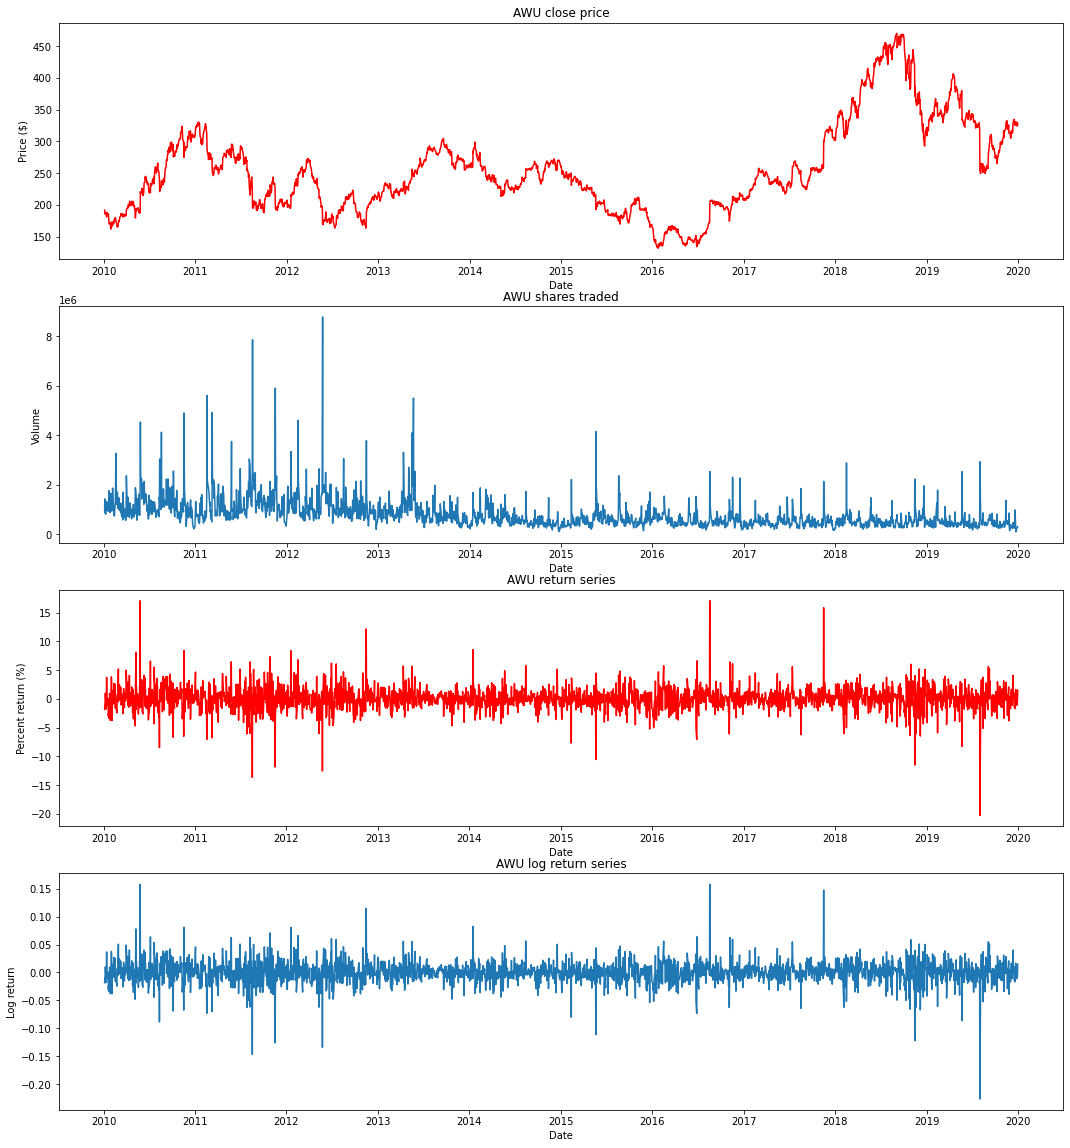

In [9]:
# plot return series, log return series, closing price, volume/shares traded

fig, ax = plt.subplots(4,1, figsize=(18,20))

ax[0].plot(df_AWU.index, df_AWU.close, c="Red")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price ($)")
ax[0].set_title("AWU close price")

ax[1].plot(df_AWU.index, df_AWU.volume)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Volume")
ax[1].set_title("AWU shares traded")

ax[2].plot(df_AWU.index[1:], AWU_return_series*100, c="Red")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Percent return (%)")
ax[2].set_title("AWU return series")

ax[3].plot(df_AWU.index[1:], AWU_log_return_series)
ax[3].set_xlabel("Date")
ax[3].set_ylabel("Log return")
ax[3].set_title("AWU log return series")

In [10]:
AWU_log_return_series.mean()

0.00021467726127969634

In [11]:
AWU_return_series.mean()

0.0004297206016033311

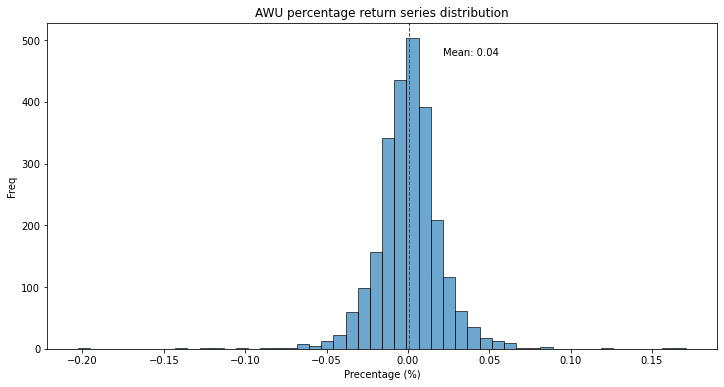

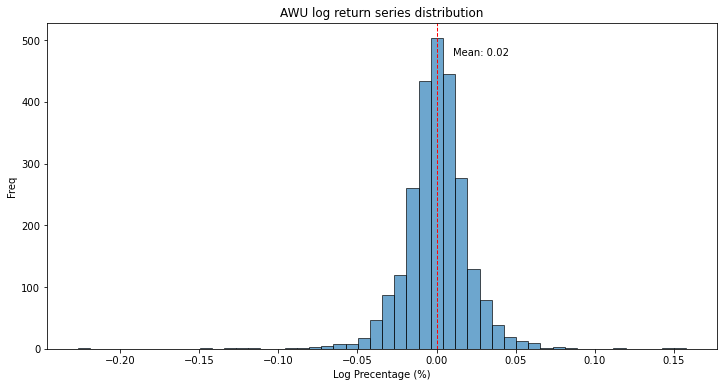

In [12]:
# plot the distribution of the return series and log return series here

plt.figure(figsize=(12,6))
plt.hist(AWU_return_series, bins=50, edgecolor="k", alpha=0.65)
plt.axvline(AWU_return_series.mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(AWU_return_series.mean()*50, max_ylim*0.9, 'Mean: {:.2f}'.format(AWU_return_series.mean()*100))
plt.title("AWU percentage return series distribution")
plt.xlabel("Precentage (%)")
plt.ylabel("Freq")
plt.show()

plt.figure(figsize=(12,6))
plt.hist(AWU_log_return_series, bins=50, edgecolor="k", alpha=0.65)
plt.axvline(AWU_log_return_series.mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(AWU_log_return_series.mean()*50, max_ylim*0.9, 'Mean: {:.2f}'.format(AWU_log_return_series.mean()*100))
plt.title("AWU log return series distribution")
plt.xlabel("Log Precentage (%)")
plt.ylabel("Freq")
plt.show()

In [13]:
print("The annualized volatility of AWU: ", ti.calc_annualized_volatility(AWU_return_series))

The annualized volatility of AWU:  0.3286556147539905


### Sharpe Ratio

- Most widely used performance metric because of its simplicity.
- In order to measure risk-adjusted return, we divide the return by a measure of risk.
- In this case, risk is an analogue of volatility.
- ***Insert formula here*** (r_a - r_b) / sigma_r
- r_a = annualized return on portfolio | r_b = annualized benchmark rate | sigma_r = annualized volatility of percentage returns

##### CAGR - Compounded Annual Growth Rate

- Sharpe ratio can be calculated over an equity curve, portfolio, or single asset
- ***Insert formula here***
- r_a = CAGR = (E_T/e_0)^1/k - 1
- T = time spanned | k = T/252 (for daily returns) 

In [14]:
print("The compunded annual growth rate of AWU: ", ti.calc_cagr(df_AWU['close']))

The compunded annual growth rate of AWU:  0.055545750640820346


In [15]:
print("The Sharpe Ration of AWU: ", ti.calc_sharpe_ratio(price_series=df_AWU['close']))

The Sharpe Ration of AWU:  0.16899855586625828


In [16]:
df_CUU = load_stock_data(ticker="CUU")
df_BMG = load_stock_data(ticker="BMG")

- ***Insert Plots Here***
- Should compare AWU, CUU and BMG 
- CUU will have a lower Sharpe Ratio than BMG despite returning more overall. This is evidence that CUU had higher volatility over that period than BMG

### Sortino Ratio

- The Sortino Ratio is an attempt at an improvement on the Sharpe Ratio
- The Sharpe Ratio penalizes large upward and downward price changes because of its simple volatility calc
- The Sortino Ratio only penalizes downward swings

- ***Insert formula here*** (r_a - r_b) / sigma_d

- sigma_d represents downside deviation of the return series, given the benchmark rate
- There is no built-in pandas function for the downside deviation introduced by the Sortino Ratio

- ***Insert formula here for downside deviation***

- As seen in the formula if the return is greater than the benchmark rate, then 0 is added instead, and therefore the volatility is only calculate on negative returns over the period
    - Note: It seems a better way to amend the Sharpe ratio might be to set specific thresholds based on a statistical measure from the benchmark rate ??

In [17]:
ti.calc_annualized_downside_deviation(AWU_return_series)

0.22961502598842032

In [18]:
ti.calc_sortino_ratio(price_series = df_AWU['close'])

0.24194135177871803

In [19]:
df_AWU['close'][0]

191.7

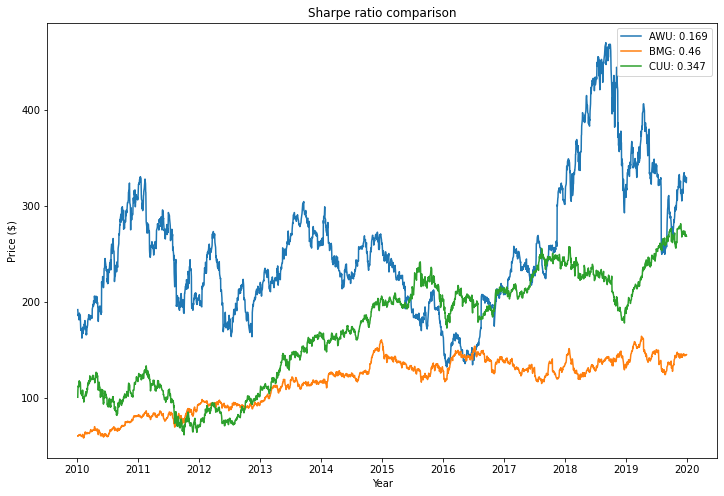

In [20]:
# plot sharpe ratio
AWU_sharpe = ti.calc_sharpe_ratio(price_series=df_AWU['close'])
BMG_sharpe = ti.calc_sharpe_ratio(price_series=df_BMG['close'])
CUU_sharpe = ti.calc_sharpe_ratio(price_series=df_CUU['close'])

plt.figure(figsize=(12,8))
plt.plot(df_AWU.index, df_AWU['close'], label = "AWU: %s" %round(AWU_sharpe, 3))
plt.plot(df_BMG.index, df_BMG['close'], label = "BMG: %s" %round(BMG_sharpe, 3))
plt.plot(df_CUU.index, df_CUU['close'], label = "CUU: %s" %round(CUU_sharpe, 3))
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title("Sharpe ratio comparison")
plt.legend()
plt.show()

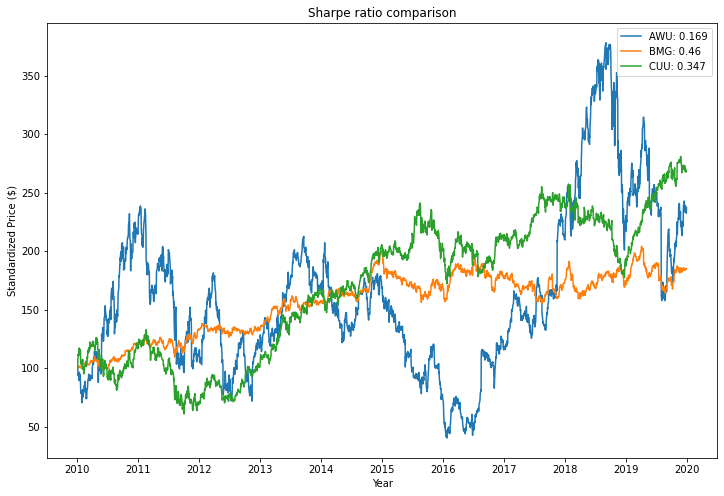

In [21]:
# plot sharpe ratio
AWU_sharpe = ti.calc_sharpe_ratio(price_series=df_AWU['close'])
BMG_sharpe = ti.calc_sharpe_ratio(price_series=df_BMG['close'])
CUU_sharpe = ti.calc_sharpe_ratio(price_series=df_CUU['close'])

plt.figure(figsize=(12,8))
plt.plot(df_AWU.index, df_AWU['close'] + (100 - df_AWU['close'][0]), label = "AWU: %s" %round(AWU_sharpe, 3))
plt.plot(df_BMG.index, df_BMG['close'] + (100 - df_BMG['close'][0]), label = "BMG: %s" %round(BMG_sharpe, 3))
plt.plot(df_CUU.index, df_CUU['close'] + (100 - df_CUU['close'][0]), label = "CUU: %s" %round(CUU_sharpe, 3))
plt.xlabel("Year")
plt.ylabel("Standardized Price ($)")
plt.title("Sharpe ratio comparison")
plt.legend()
plt.show()

# TECHNICAL INDICATORS
- Technical indicators attempt to uncover patterns in market behavior using market activity to produce trading signals
- Technical indicators are useful in so much as they are able to produce statistically relevant returns; we will explore whether the technical indicators can do so in future chapters

### Rolling Functions and Algorithms

- Technical indicators are generally rolling functions that return a data structure equal in shape to the input
- A simple trailing window of length *m* will supply entries of *y_i* from *t - m - 1* through *t* at time *t* of some function
- More complex windows such as triangular or Gaussian will apply weights to each data point within the time interval

#### Simple Moving Average
- Simple yet relevant in financial analysis is the SMA
- Simply the average of the elements within the period *m*
- ***Insert formula here***

### Oscillators

- Oscillators commonly have a relationship to the first derivative of an asset's underlying price history and often appear under the price history in financial charting software
- Popular oscillators are the Moving Average Convergence Divergence (MACD) and the Relative Strength Index (RSI)

#### MACD
- MACD is the difference between two moving averages at different legnths
- As long as the stock price does not remain stable in a perfectly straight line the moving averages will tend to converge and diverge
- Thus, the difference will oscillate between negative and positive values
- ***Insert formula here***


In [22]:
df = pd.DataFrame()

df_AWU['price_delta'], df_AWU['gain_ser'], df_AWU['loss_ser'], df_AWU['avg_gain_ser'], df_AWU['avg_loss_ser'], \
    df_AWU['rs_ser'], df_AWU['rsi_ser'] = ti.calculate_rsi(df_AWU['close'], 20)

df_AWU.dropna(inplace=True)
df_AWU.head()

In [23]:
df_AWU.loc['prediction'] = df_AWU.loc[(df_AWU['price_delta'] < 0), 'prediction'] = 0
df_AWU.loc['prediction'] = df_AWU.loc[(df_AWU['price_delta'] > 0), 'prediction'] = 1
df_AWU.loc['prediction'] = df_AWU.loc[(df_AWU['price_delta'] == 0), 'prediction'] = 0

In [24]:
df_AWU.drop(index=['prediction'], inplace=True)

df_AWU['prediction'] = df_AWU['prediction'].apply(int)
df_AWU.head()

In [25]:
df_AWU['price_gain_tomorrow'] = df_AWU['prediction'].shift(-1, fill_value=0)

In [26]:
df_AWU

,open,close,low,high,volume,price_delta,gain_ser,loss_ser,avg_gain_ser,avg_loss_ser,rs_ser,rsi_ser,prediction,price_gain_tomorrow
date,,,,,,,,,,,,,,
2010-01-04,193.94,191.70,190.63,195.51,968029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2010-01-05,191.02,188.17,186.99,192.42,1427075,-3.53,0.00,-3.53,NaN,NaN,NaN,NaN,0.0,0.0
2010-01-06,187.17,186.50,185.10,190.07,879014,-1.67,0.00,-1.67,NaN,NaN,NaN,NaN,0.0,0.0
2010-01-07,185.03,185.19,183.63,186.64,1003719,-1.31,0.00,-1.31,NaN,NaN,NaN,NaN,0.0,1.0
2010-01-08,184.67,187.02,182.78,187.27,804716,1.83,1.83,0.00,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,331.06,330.85,328.43,332.91,98751,0.24,0.24,0.00,1.793414,-1.170867,1.531697,60.500809,1.0,0.0
2019-12-26,331.36,329.05,327.47,333.05,209398,-1.80,0.00,-1.80,1.195609,-1.380578,0.866021,46.410032,0.0,0.0
2019-12-27,332.47,325.38,325.16,332.47,225667,-3.67,0.00,-3.67,0.797073,-2.143719,0.371818,27.104027,0.0,0.0


In [27]:
df_AWU['MACD'] = ti.calc_macd(df_AWU['close'])

- We will determine if the technical signals or indicators provide any value to investors, using simulation methods later
- The MACD indicator is traditionally used as a momentum-based entry signal
    - Buy signals occur when the MACD line crosses from below zero to above zero
    - Sell signals occur in the opposite direction
- It is momentum-based in the sense that, to move across the zero line, there has to be some short-term directional momentum in the asset price
- The opposite of a momentum-based indicator is a reversal-based indicator

### Overlays

- The second major class of indicators, overlays are generally related to the stock price in both units and position
- These indicators typically appear on the same chart as the price history 
- Popular indicators include the Bollinger Bands and the Ichimoku Cloud

#### Bollinger Bands
- Bollinger Bands combine moving avgs with an alternative measure of volatility to create a 3 part overlay
- Three bands: Upper, Middle and Lower
- The middle band is typically 20-day simple moving avg, and the upper/lower are +/- a rolling 20-day std of the middle

- Notice the std is take against the price series as opposed to the return series, as is typical when discussing volatility
- Taken against the price series only has statistical relevance when done over very short periods
- ***Insert plot of Bollinger Bands overlaid on the price series***
- The Bollinger Bands provide a pretense for the reversal method mentioned previously; if the price series exceeds the upper band, then a reversal signal to sell is triggered and if it descends below the lower band a buy signal is triggered

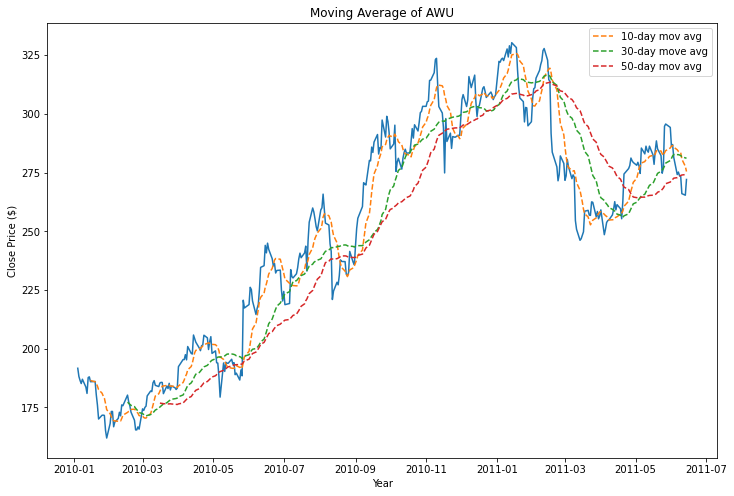

In [28]:
# plot moving averages at different windows, return series, and volatility
plt.figure(figsize=(12,8))
plt.plot(df_AWU.index[:365], df_AWU['close'][:365])
plt.plot(df_AWU.index[:365], ti.calc_sma(df_AWU['close'][:365], 10), linestyle='dashed', label='10-day mov avg')
plt.plot(df_AWU.index[:365], ti.calc_sma(df_AWU['close'][:365], 30), linestyle='dashed', label='30-day move avg')
plt.plot(df_AWU.index[:365], ti.calc_sma(df_AWU['close'][:365], 50), linestyle='dashed', label='50-day mov avg')
plt.xlabel("Year")
plt.ylabel("Close Price ($)")
plt.title("Moving Average of AWU")
plt.legend()
plt.show()

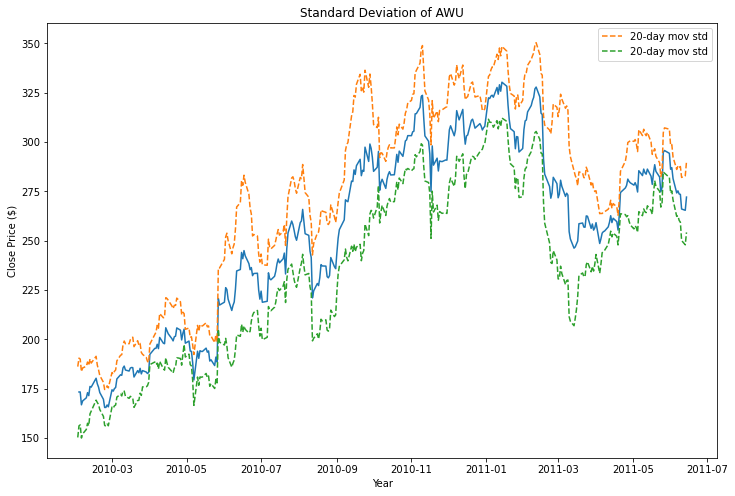

In [29]:
# plot moving averages at different windows, return series, and volatility
plt.figure(figsize=(12,8))
plt.plot(df_AWU.index[20:365], df_AWU['close'][20:365])
plt.plot(df_AWU.index[:365], df_AWU['close'][:365] + ti.calc_smstd(df_AWU['close'][:365], 20)*2, linestyle='dashed', \
         label='20-day mov std')
plt.plot(df_AWU.index[:365], df_AWU['close'][:365] - ti.calc_smstd(df_AWU['close'][:365], 20)*2, linestyle='dashed', \
         label='20-day mov std')
plt.xlabel("Year")
plt.ylabel("Close Price ($)")
plt.title("Standard Deviation of AWU")
plt.legend()
plt.show()

In [30]:
AWU_boll = ti.calc_bollinger_bands(df_AWU['close'][:365], 20)
AWU_boll.dropna(inplace=True)
AWU_boll.head()

,middle,upper,lower
date,,,
2010-02-01,179.4085,197.355729,161.461271
2010-02-02,178.4890,195.651938,161.326062
2010-02-03,177.7460,194.424066,161.067934
2010-02-04,176.7610,193.588470,159.933530
2010-02-05,175.9400,192.637652,159.242348


In [31]:
df_AWU['middle_boll'], df_AWU['upper_boll'], df_AWU['lower_boll'] = \
    ti.calc_bollinger_bands(df_AWU['close'], 20)['middle'], \
    ti.calc_bollinger_bands(df_AWU['close'], 20)['upper'], \
    ti.calc_bollinger_bands(df_AWU['close'], 20)['lower']

# Stochastic Oscillator

# Williams %R

# Price Rate of Change

In [32]:
df_AWU['PROC'] = ti.PROC(df_AWU['close'], 9)

In [33]:
df_AWU['rolling_low'] = ti.roll_low(ser=df_AWU['close'], n=14)

In [34]:
df_AWU['rolling_high'] = ti.roll_high(ser=df_AWU['close'], n=14)

In [35]:
df_AWU['k_percent'] = ti.k_percent(ser=df_AWU['close'], n=14)

In [36]:
df_AWU['r_percent'] = ti.r_percent(ser=df_AWU['close'], n=14)

In [37]:
df_AWU['MACD_EMA9'] = df_AWU['MACD'].ewm(span=9).mean()

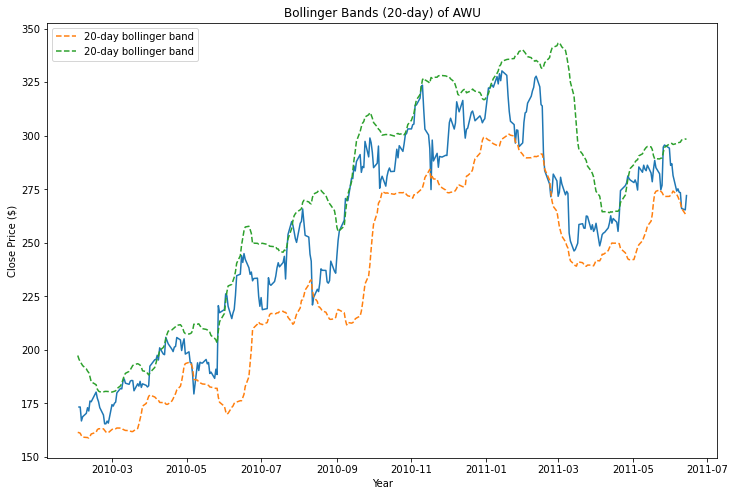

In [38]:
# plot moving averages at different windows, return series, and volatility
plt.figure(figsize=(12,8))
plt.plot(df_AWU.index[20:365], df_AWU['close'][20:365])
plt.plot(df_AWU.index[19:365], AWU_boll.lower, linestyle='dashed', label='20-day bollinger band')
plt.plot(df_AWU.index[19:365], AWU_boll.upper, linestyle='dashed', label='20-day bollinger band')
plt.xlabel("Year")
plt.ylabel("Close Price ($)")
plt.title("Bollinger Bands (20-day) of AWU")
plt.legend()
plt.show()

ROC-AUC on drop in above plot (conf matr)

# On Balance Volume

In [39]:
def OBV(ser: pd.Series, vol_ser: pd.Series):
    """
    calculate the on balance volume of the close price for the dataframe
    """
    
    return pd.Series(np.where(ser > ser.shift(1), vol_ser, np.where(ser < ser.shift(1), -vol_ser, 0)).cumsum(), index=df_AWU.index)

In [40]:
OBV(df_AWU['close'], df_AWU['volume'])

date
2010-01-04          0
2010-01-05   -1427075
2010-01-06   -2306089
2010-01-07   -3309808
2010-01-08   -2505092
               ...   
2019-12-24   -1961511
2019-12-26   -2170909
2019-12-27   -2396576
2019-12-30   -2685842
2019-12-31   -2379185
Length: 2516, dtype: int64

In [41]:
df_AWU['OBV'] = OBV(ser=df_AWU['close'], vol_ser=df_AWU['volume'])

In [42]:
# could also do all stocks combined returns distribution here

In [43]:
# could also do scatter plots of 5 highest performing stocks

In [44]:
# find most correlated stocks with target variable

# MODELLING

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix,confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,f1_score, precision_recall_curve
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier

In [46]:
df_AWU.columns

Index(['open', 'close', 'low', 'high', 'volume', 'price_delta', 'gain_ser',
       'loss_ser', 'avg_gain_ser', 'avg_loss_ser', 'rs_ser', 'rsi_ser',
       'prediction', 'price_gain_tomorrow', 'MACD', 'middle_boll',
       'upper_boll', 'lower_boll', 'PROC', 'rolling_low', 'rolling_high',
       'k_percent', 'r_percent', 'MACD_EMA9', 'OBV'],
      dtype='object')

In [47]:
df_AWU.dropna(inplace=True)
df_AWU['prediction'] = df_AWU['prediction'].apply(int)

In [48]:
# Create the target and features datasets
X = df_AWU[['rsi_ser', 'k_percent', 'r_percent', 'MACD', 'PROC', 'OBV', 'price_delta', 'MACD_EMA9']]
y = df_AWU['price_gain_tomorrow']



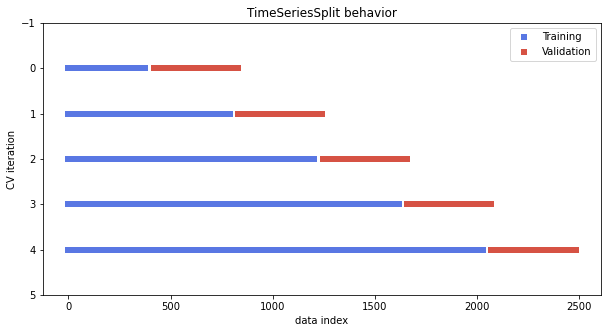

In [49]:
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits=5, gap=40)
fig, ax = plt.subplots(figsize=(10,5))

for ii, (tr, tt) in enumerate(cv.split(X, y)):
    l1 = ax.scatter(tr, [ii]*len(tr), c=[plt.cm.coolwarm(.1)], marker='_', lw=6)
    l2 = ax.scatter(tt, [ii]*len(tt), c=[plt.cm.coolwarm(0.9)], marker='_', lw=6)
    ax.set(ylim=[5, -1], title='TimeSeriesSplit behavior', xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [50]:
# Perform a grid-serach cv on the RandomForestClassifier

rf_class = RandomForestClassifier()
param_search = {'max_features' : [3, 4, 5],
                'max_depth' : [x for x in range(5, 25, 5)], 
                'n_estimators' : [100],
                'min_samples_leaf' : [x**2 for x in range(3, 50, 10)]
               }

rf_model = GridSearchCV(estimator = rf_class, 
                           cv = cv, 
                           param_grid = param_search,
                           scoring = 'accuracy', 
                           return_train_score=True)

rf_model.fit(X,y)

GridSearchCV(cv=TimeSeriesSplit(gap=40, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [9, 169, 529, 1089, 1849],
                         'n_estimators': [100]},
             return_train_score=True, scoring='accuracy')

In [51]:
print("Best Parameters for RandomForestClassifier       : ", rf_model.best_params_)
print("\n")
print("Best average accuracy for RandomForestClassifier : ", rf_model.best_score_)

Best Parameters for RandomForestClassifier       :  {'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 529, 'n_estimators': 100}


Best average accuracy for RandomForestClassifier :  0.5191283292978207


In [52]:
tr, tt = int(len(X)*0.8 - 20), int(len(X)*0.8 + 20)

X_tr, X_tt = X.iloc[:tr], X.iloc[tt:]
y_tr, y_tt = y.iloc[:tr], y.iloc[tt:]

In [53]:
rf_model = RandomForestClassifier(**rf_model.best_params_)
rf_model.fit(X_tr, y_tr)
y_pred_rf = rf_model.predict(X_tt)
print(classification_report(y_tt,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.45      0.33      0.38       213
         1.0       0.55      0.67      0.61       264

    accuracy                           0.52       477
   macro avg       0.50      0.50      0.49       477
weighted avg       0.51      0.52      0.51       477



In [54]:
roc_auc_score(y_tt,y_pred_rf)

0.5018939393939394

In [55]:
y_pred_rf_p = rf_model.predict_proba(X_tt)[:,1]
roc_auc_score(y_tt,y_pred_rf_p)

0.4934645753307725

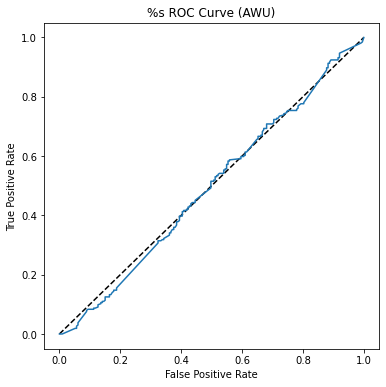

In [56]:
fpr, tpr, thresholds  = roc_curve(y_tt, y_pred_rf_p)
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve (AWU)')
plt.show()

Confusion matrix (AWU)


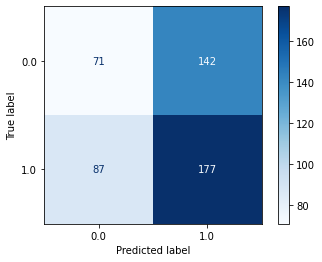

In [57]:
print("Confusion matrix (AWU)")
plot_confusion_matrix(rf_model, X_tt, y_tt, cmap=plt.cm.Blues)
plt.show()

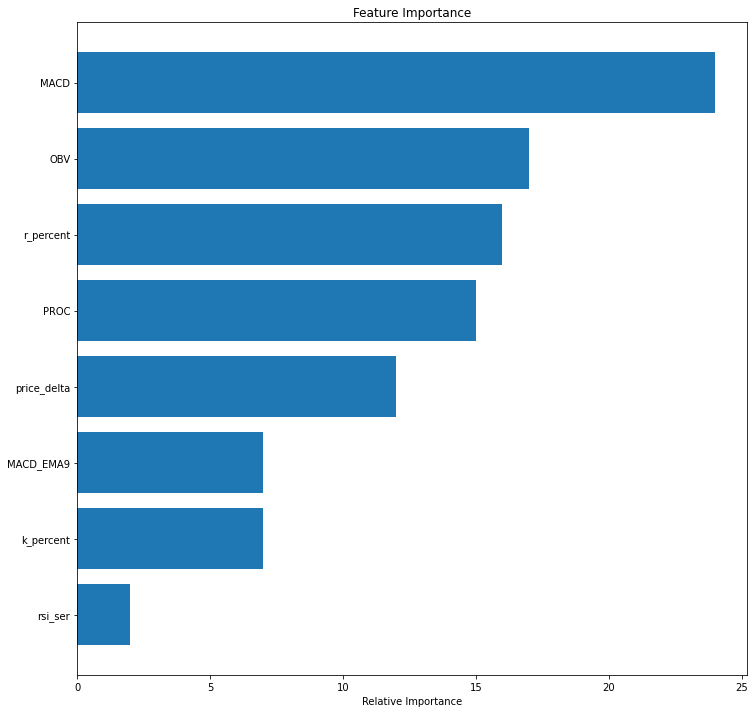

In [58]:
feature_import = rf_model.feature_importances_[:len(X_tr)]
feature_import = feature_import*100

sorted_idx = np.argsort(feature_import)
pos = np.arange(sorted_idx.shape[0])
sorted_idx.size
plt.figure(figsize=(12,12))
plt.barh(pos, feature_import[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

# BACKTEST (SIMULATOR)

In [59]:
y_pred_rf

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
# need to add the open and close prices
# need to create the return series based on our execution strategy
# need to add S&P 500 return series


backtest_df = pd.DataFrame(data=zip(y_pred_rf, df_AWU['close'][tt:], df_AWU['open'][tt:], df_SP500['close'][tt:]), index=y_tt.index, columns=['buy_days', 'AWU_close', 'AWU_open', 'SPY'])
backtest_df 

,buy_days,AWU_close,AWU_open,SPY
date,,,,
2018-02-08,0.0,304.56,315.46,267.03
2018-02-09,0.0,308.90,310.77,267.58
2018-02-12,0.0,318.04,314.19,267.51
2018-02-13,0.0,322.90,327.57,267.19
2018-02-14,0.0,333.39,320.58,267.32
...,...,...,...,...
2019-12-24,1.0,330.85,331.06,307.10
2019-12-26,1.0,329.05,331.36,308.18
2019-12-27,1.0,325.38,332.47,308.94


In [61]:
backtest_df['AWU_gains_losses'] = backtest_df['AWU_close'] - backtest_df['AWU_close'].shift(-1)
backtest_df.fillna(0)

,buy_days,AWU_close,AWU_open,SPY,AWU_gains_losses
date,,,,,
2018-02-08,0.0,304.56,315.46,267.03,-4.34
2018-02-09,0.0,308.90,310.77,267.58,-9.14
2018-02-12,0.0,318.04,314.19,267.51,-4.86
2018-02-13,0.0,322.90,327.57,267.19,-10.49
2018-02-14,0.0,333.39,320.58,267.32,16.74
...,...,...,...,...,...
2019-12-24,1.0,330.85,331.06,307.10,1.80
2019-12-26,1.0,329.05,331.36,308.18,3.67
2019-12-27,1.0,325.38,332.47,308.94,1.32


In [62]:
# create floats of shares purchased based on a $100,000 investment
shares_AWU = 100000 / backtest_df['AWU_open'][0]
shares_SPY = 100000 / backtest_df['SPY'][0]

backtest_df.loc['returns'] = backtest_df.loc[(backtest_df['buy_days'] == 1), 'returns'] = backtest_df['AWU_gains_losses']*shares_AWU
backtest_df.loc['returns'] = backtest_df.loc[(backtest_df['buy_days'] == 0), 'returns'] = int(0)

backtest_df['SPY_portfolio_series'] = backtest_df['SPY'] * shares_SPY

In [63]:
backtest_df

,buy_days,AWU_close,AWU_open,SPY,AWU_gains_losses,returns,SPY_portfolio_series
date,,,,,,,
2018-02-08 00:00:00,0.0,304.56,315.46,267.03,-4.34,0.000000,100000.000000
2018-02-09 00:00:00,0.0,308.90,310.77,267.58,-9.14,0.000000,100205.969367
2018-02-12 00:00:00,0.0,318.04,314.19,267.51,-4.86,0.000000,100179.755084
2018-02-13 00:00:00,0.0,322.90,327.57,267.19,-10.49,0.000000,100059.918361
2018-02-14 00:00:00,0.0,333.39,320.58,267.32,16.74,0.000000,100108.602030
...,...,...,...,...,...,...,...
2019-12-26 00:00:00,1.0,329.05,331.36,308.18,3.67,1163.380460,115410.253530
2019-12-27 00:00:00,1.0,325.38,332.47,308.94,1.32,418.436569,115694.865745
2019-12-30 00:00:00,1.0,324.06,323.75,308.35,-4.87,-1543.777341,115473.916788


In [64]:
backtest_df.drop(index=['returns'], inplace=True)

In [65]:
portfolio_series = backtest_df['returns'].cumsum(axis=0) + backtest_df['AWU_open'][0]*shares_AWU
portfolio_series

date
2018-02-08    100000.000000
2018-02-09    100000.000000
2018-02-12    100000.000000
2018-02-13    100000.000000
2018-02-14    100000.000000
                  ...      
2019-12-24     76982.818741
2019-12-26     78146.199201
2019-12-27     78564.635770
2019-12-30     77020.858429
2019-12-31              NaN
Name: returns, Length: 477, dtype: float64

In [66]:
backtest_df['portfolio_series'] = portfolio_series

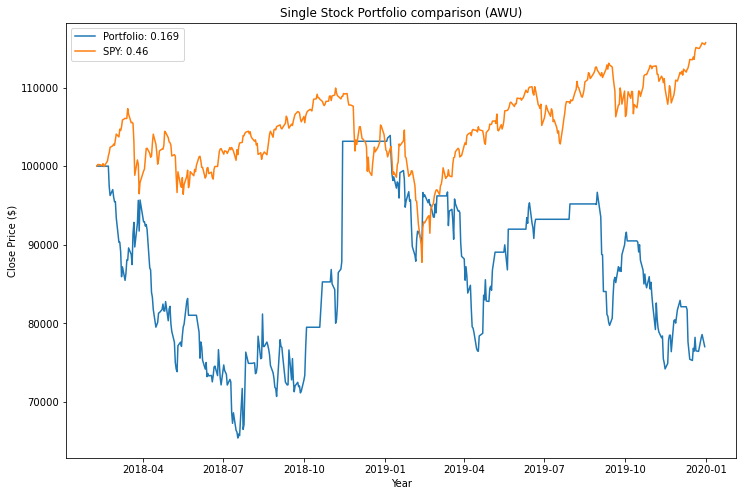

In [67]:
# plot sharpe ratio
# AWU_sharpe = ti.calc_sharpe_ratio(price_series=df_AWU['close'])
# BMG_sharpe = ti.calc_sharpe_ratio(price_series=df_BMG['close'])
# CUU_sharpe = ti.calc_sharpe_ratio(price_series=df_CUU['close'])

plt.figure(figsize=(12,8))
plt.plot(backtest_df.index, backtest_df['portfolio_series'], label = "Portfolio: %s" %round(AWU_sharpe, 3))
plt.plot(backtest_df.index, backtest_df['SPY_portfolio_series'], label = "SPY: %s" %round(BMG_sharpe, 3))
# plt.plot(backtest_df.index, backtest_df['portfolio_series'] + (100 - backtest_df['portfolio_series'][0]), label = "Portfolio: %s" %round(AWU_sharpe, 3))
# plt.plot(backtest_df.index, backtest_df['SPY_portfolio_series'] + (100 - backtest_df['SPY_portfolio_series'][0]), label = "SPY: %s" %round(BMG_sharpe, 3))
# plt.plot(df_CUU.index, df_CUU['close'] + (100 - df_CUU['close'][0]), label = "CUU: %s" %round(CUU_sharpe, 3))
plt.xlabel("Year")
plt.ylabel("Close Price ($)")
plt.title("Single Stock Portfolio comparison (AWU)")
plt.legend()
plt.show()

In [68]:
# #backtest_df['AWU_return_series'] = backtest_df['AWU_close'][0] * shares_AWU
# backtest_df['AWU_return_series'] = backtest_df['AWU_return_series'].shift(fill_value=backtest_df['AWU_close'][0] * shares_AWU) + backtest_df['returns']

In [69]:
# create the execution strategy (buy if the stock will go up - sell at end of day)
# plot the performance of the return series for investing in our execution strategy vs S&P500


